In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import halotools

In [48]:
from halotools.empirical_models import PrebuiltSubhaloModelFactory
from halotools.empirical_models import PrebuiltHodModelFactory
from halotools.sim_manager import CachedHaloCatalog
from halotools.utils import group_member_generator
from halotools.mock_observables import mean_y_vs_x
from halotools.mock_observables import return_xyz_formatted_array
from halotools.mock_observables import wp
from halotools.mock_observables import FoFGroups
from halotools.mock_observables import mean_radial_velocity_vs_r

## Calculate projected clustering signal of a mock catalog

In [59]:
#model=PrebuiltHodModelFactory('tinker13', threshold=10.25)
#halocat=CachedHaloCatalog(simname='bolshoi', redshift=0, halo_finder='rockstar')
#model.populate_mock(halocat)

## Identify galaxy groups in mock galaxies

In [23]:
model=PrebuiltSubhaloModelFactory('behroozi10')
halocat=CachedHaloCatalog(simname='bolshoi', redshift=0, halo_finder='rockstar')
model.populate_mock(halocat)

In [7]:
sample_mask=model.mock.galaxy_table['stellar_mass']>10**10.75
galaxy_sample=model.mock.galaxy_table[sample_mask]

#only galaxies above mass of 10^10.75

In [8]:
x=galaxy_sample['x']
y=galaxy_sample['y']
z=galaxy_sample['z']
vz=galaxy_sample['vz']

In [9]:
pos=return_xyz_formatted_array(x, y, z,
                              velocity=vz, velocity_distortion_dimension='z')
# redshift distortions added

In [10]:
# linking lengths specified by b_para and b_perp

b_para, b_perp = 0.7, 0.15
groups=FoFGroups(pos, b_perp, b_para,
                Lbox=model.mock.Lbox, num_threads='max')

galaxy_sample['fof_group_id']=groups.group_ids

In [16]:
galaxy_sample['negative_stellar_mass']=-1*galaxy_sample['stellar_mass']
galaxy_sample.sort(['fof_group_id', 'negative_stellar_mass'])
grouping_key='fof_group_id'
requested_columns=[]

group_gen=group_member_generator(galaxy_sample, grouping_key, requested_columns)

group_central=np.zeros(len(galaxy_sample), dtype=bool)
for first, last, member_props in group_gen:
    temp_result=[False for member in range(first, last)]
    temp_result[0]=True
    group_central[first:last]=temp_result

galaxy_sample['group_central']=group_central

# sort by FoF ID
# within group sorted by -M
# (massive groups placed first)

In [34]:
print(galaxy_sample[0:15])

    halo_mvir     halo_vz  halo_z  ... group_richness group_central_true_mvir
----------------- ------- -------- ... -------------- -----------------------
164300000000000.0  -82.51 17.71299 ...              1                     0.0
 41560000000000.0  490.89 37.49146 ...              3                     0.0
158900000000000.0 -132.11 39.91124 ...              3                     0.0
  5106000000000.0 -260.49 40.27675 ...              3                     0.0
114400000000000.0  -61.29  9.54759 ...              2                     0.0
   389400000000.0  -92.45  9.62159 ...              2                     0.0
 97090000000000.0  423.44  6.51834 ...              1                     0.0
 85270000000000.0  179.34 17.82519 ...              1                     0.0
 84260000000000.0 -187.27 22.29268 ...              1                     0.0
 83570000000000.0 -386.58  33.6698 ...              2                     0.0
  1575000000000.0 -804.86 33.71918 ...              2           

In [25]:
# calculate number of members in each FoF group

rouping_key='fof_group_id'
requested_columns=[]

group_gen=group_member_generator(galaxy_sample, grouping_key, requested_columns)

group_richness=np.zeros(len(galaxy_sample), dtype=int)
for first, last, member_props in group_gen:
    group_richness[first:last]=last-first
    galaxy_sample['group_richness']=group_richness

In [35]:
print(galaxy_sample[0:15])

    halo_mvir     halo_vz  halo_z  ... group_richness group_central_true_mvir
----------------- ------- -------- ... -------------- -----------------------
164300000000000.0  -82.51 17.71299 ...              1                     0.0
 41560000000000.0  490.89 37.49146 ...              3                     0.0
158900000000000.0 -132.11 39.91124 ...              3                     0.0
  5106000000000.0 -260.49 40.27675 ...              3                     0.0
114400000000000.0  -61.29  9.54759 ...              2                     0.0
   389400000000.0  -92.45  9.62159 ...              2                     0.0
 97090000000000.0  423.44  6.51834 ...              1                     0.0
 85270000000000.0  179.34 17.82519 ...              1                     0.0
 84260000000000.0 -187.27 22.29268 ...              1                     0.0
 83570000000000.0 -386.58  33.6698 ...              2                     0.0
  1575000000000.0 -804.86 33.71918 ...              2           

In [28]:
galaxy_sample.sort(['fof_group_id', 'negative_stellar_mass'])
grouping_key = 'fof_group_id'
requested_columns = ['halo_mvir_host_halo']
group_gen = group_member_generator(galaxy_sample, grouping_key, requested_columns)

In [30]:
group_central_true_mvir = np.zeros(len(galaxy_sample))
for first, last, member_props in group_gen:
    member_masses = member_props[0]
    true_mass = member_masses[0]
    group_central_true_mvir[first:last] = true_mass

galaxy_sample['group_central_true_mvir'] = group_central_true_mvir

#calculate true halo mass of central group

In [36]:
print(galaxy_sample[0:10])

    halo_mvir     halo_vz  halo_z  ... group_richness group_central_true_mvir
----------------- ------- -------- ... -------------- -----------------------
164300000000000.0  -82.51 17.71299 ...              1                     0.0
 41560000000000.0  490.89 37.49146 ...              3                     0.0
158900000000000.0 -132.11 39.91124 ...              3                     0.0
  5106000000000.0 -260.49 40.27675 ...              3                     0.0
114400000000000.0  -61.29  9.54759 ...              2                     0.0
   389400000000.0  -92.45  9.62159 ...              2                     0.0
 97090000000000.0  423.44  6.51834 ...              1                     0.0
 85270000000000.0  179.34 17.82519 ...              1                     0.0
 84260000000000.0 -187.27 22.29268 ...              1                     0.0
 83570000000000.0 -386.58  33.6698 ...              2                     0.0


### Calculate mean infall velocity of galaxies towards the clusters BCGs (bright cluster galaxies)

In [37]:
model=PrebuiltSubhaloModelFactory('smhm_binary_sfr')
halocat=CachedHaloCatalog(simname='bolshoi', redshift=0, halo_finder='rockstar')
model.populate_mock(halocat)

In [38]:
# extract position and vel. coord

cluster_central_mask = (model.mock.galaxy_table['stellar_mass'] > 10**11.5)
cluster_centrals = model.mock.galaxy_table[cluster_central_mask]

In [39]:
low_mass_tracers_mask = ((model.mock.galaxy_table['stellar_mass'] > 10**10) &
                         (model.mock.galaxy_table['stellar_mass'] < 10**10.5))
low_mass_tracers = model.mock.galaxy_table[low_mass_tracers_mask]

In [40]:
cluster_pos = return_xyz_formatted_array(cluster_centrals['x'],
    cluster_centrals['y'] ,cluster_centrals['z'])
cluster_vel = return_xyz_formatted_array(cluster_centrals['vx'],
    cluster_centrals['vy'] ,cluster_centrals['vz'])

In [41]:
low_mass_tracers_pos = return_xyz_formatted_array(low_mass_tracers['x'],
    low_mass_tracers['y'], low_mass_tracers['z'])
low_mass_tracers_vel = return_xyz_formatted_array(low_mass_tracers['vx'],
    low_mass_tracers['vy'], low_mass_tracers['vz'])

In [44]:
# calculate velocity

rbins = np.logspace(-0.5, 1.25, 15)
rbin_midpoints = (rbins[1:] + rbins[:-1])/2.

vr_clusters = mean_radial_velocity_vs_r(cluster_pos, cluster_vel, rbins_absolute=rbins,
                                        sample2=low_mass_tracers_pos, velocities2=low_mass_tracers_vel,
                                        period = model.mock.Lbox)

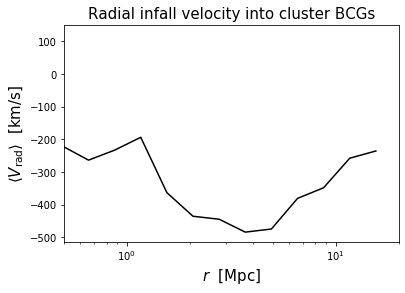

In [45]:
fig, ax = plt.subplots(1, 1)

__=ax.plot(rbin_midpoints, vr_clusters, color='k')
xscale = ax.set_xscale('log')

xlim = ax.set_xlim(xmin=0.5, xmax=20)

xlabel = ax.set_xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=15)
ylabel = ax.set_ylabel(r'$\langle V_{\rm rad}\rangle$  $[{\rm km/s}]$', fontsize=15)
title = ax.set_title('Radial infall velocity into cluster BCGs', fontsize=15)